In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import models,layers , optimizers , datasets , utils
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [3]:
#CNN for MNIST Recognition
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train_data = x_train[0:60000]
x_test_data = x_test[0:10000]
y_train = utils.to_categorical(y_train, 10)
y_train_data = y_train[0:60000]
y_test = utils.to_categorical(y_test, 10)
y_test_data = y_test[0:10000]

inputs = layers.Input(shape=(28,28,1,))
x = Conv2D(32 , kernel_size=(3,3) , activation='relu',input_shape=(28,28,1))(inputs)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(64 , kernel_size=(3,3) , activation='relu')(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x= Dense(128,activation='relu')(x)
x = Dense(32,activation='relu')(x)
outputs = Dense(10,activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer = 'nadam', metrics =['accuracy'])
history = model.fit( x_train_data , y_train_data , batch_size = 32, epochs =10)
loss, score = model.evaluate(x_test_data, y_test_data)
print(score)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2608 - accuracy: 0.9287
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0682 - accuracy: 0.9803
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0497 - accuracy: 0.9856
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0427 - accuracy: 0.9878
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0389 - accuracy: 0.9889
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0313 - accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0256 - accuracy: 0.9923
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0233 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0237 - accuracy: 0.9938
Epoch 10/10
313/3

In [4]:
# Predicting the test data
predict_y = model.predict(x_test_data)
predict_y = np.around(predict_y,0)
print(predict_y)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
#Freezing all the layers
for layer in model.layers:
  layer.trainable = False

In [6]:
numInput = model.output
h = layers.Dense(10, activation='relu')(numInput)
outputs = layers.Dense(2, activation='linear')(h)
relu_model = models.Model(inputs=model.input, outputs=outputs)

RMSprop = optimizers.RMSprop(lr=0.01)
relu_model.compile(loss='mse', optimizer=RMSprop)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers, optimizers
def tau(s,a):
  if (s[0] and s[9]) == 0 : 
    s=np.roll(s,a) 
  return s

# Getting image input based on state
def imagestate(s):
  match = np.where((predict_y == s).all(axis=1))
  match = np.array(match).flatten()
  match1 = np.random.choice(match, 1)
  nextimage = x_train_data[match1]
  return nextimage

def rho(s):
  return ((s[0]==1)+2*(s[9]==1))    

def terminal_state(s):
  return (s[0]==1 or s[9]==1) 

def rho1(s,a):
    return (s==1 and a==-1)+2*(s==8 and a == 1)
 
def calc_policy(Q):
    policy=np.zeros(10)
    for s in range(0,10):
        action_idx=np.argmax(Q[s,:])
        policy[s]=2*action_idx-1
        policy[0]=policy[9]=0
    return policy.astype(int)   

gamma=0.8
invT = 1.0

In [12]:
# Code for getting actual Q values which will be used to find error while training the model
i=0; R=np.zeros(20)
for s in range(0,10):
    for a in range(-1,2,2):  
        #print("a",a)
        R[i]=rho1(s,a)
        i += 1
print(R)
        
# Transition matrix
T=np.zeros([20,20]);
T[0,0]=1; T[1,1]=1; T[2,0]=1; T[3,5]=1; T[4,2]=1
T[5,7]=1; T[6,4]=1; T[7,9]=1; T[8,6]=1; T[9,11]=1
T[10,8]=1;T[11,13]=1;T[12,10]=1;T[13,15]=1;T[14,12]=1
T[15,17]=1; T[16,14]=1; T[17,19]=1;T[19,19]=1
 
# Q- function
Q=np.linalg.inv(np.eye(20)-gamma*T) @ np.transpose(R)
Q = Q.reshape(10,2)
policy=calc_policy(Q)
print('Q_values: \n',np.transpose(Q))
print('policy: \n',np.transpose(policy))

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0.]
Q_values: 
 [[0.        1.        0.8       0.64      0.512     0.4096    0.32768
  0.262144  0.2097152 0.       ]
 [0.        0.4194304 0.524288  0.65536   0.8192    1.024     1.28
  1.6       2.        0.       ]]
policy: 
 [ 0 -1 -1  1  1  1  1  1  1  0]


Text(0, 0.5, 'state')

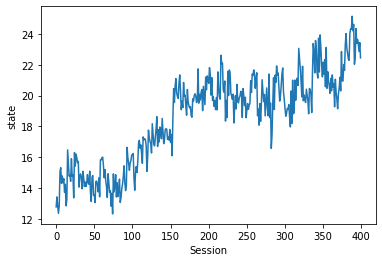

In [14]:
# Storing the error values of iterations in a list
error=[]
# Defining a Q function which will be changing through out the iterations
Q_Values=np.zeros([10,2])
for trial in range(400):
  #Taking a random image
  i = np.random.randint(1,9)
  state = np.zeros((10,))
  state[i] = 1
  simage = imagestate(state)
  while True:
    if terminal_state(state): 
      break
    if trial > 50 and invT > 0.1: 
      invT -= 1.0

    prediction=relu_model.predict(simage, steps=1, verbose=0)
    aidx=np.argmax(prediction)

    # Getting state number from one-hot encoded state
    number = np.where(state == 1)
    number = np.array(number).flatten()
    s = number[0]
    Q_Values[s]=prediction

    if np.random.rand() < invT : 
      aidx=1-aidx
    a=2*aidx-1
    next_state = tau(state,a)
    next_image = imagestate(next_state)
    if terminal_state(next_state): 
      y = rho(next_state)
    else:
      y = rho(next_state) + gamma*np.max(relu_model.predict(next_image, steps=1, verbose=0))
    prediction[0,aidx]=y
    relu_model.fit(simage, prediction, epochs=1, verbose=0)
    simage = np.copy(next_image)
    state = np.copy(next_state)
  error.append(np.sum(np.sum(np.abs(np.subtract(Q_Values,Q))))) 
plt.plot(error); 
plt.xlabel('Session'); 
plt.ylabel('state')

In [19]:
policy = np.zeros(10)
Q=[]

image = np.zeros((1,x_test_data.shape[1],x_test_data.shape[2]))
image[0] = x_test_data[3]
s = predict_y[3]
s = np.around(s,0)
for i in range(0,10):
    Qs=relu_model.predict(image, steps=1)[0]
    Q.append(Qs)
    aidx=np.argmax(Qs)
    policy[i]=2*aidx-1
    s = np.roll(s,1)
    image = imagestate(s)
print(np.transpose(Q))
print('policy:',np.transpose(policy))

[[0.8570617 0.8570617 0.8570617 0.8570617 0.8570617 0.8570617 0.8570617
  0.8570617 0.8570617 0.8570617]
 [1.1942912 1.1942912 1.1942912 1.1942912 1.1942912 1.1942912 1.1942912
  1.1942912 1.1942912 1.1942912]]
policy: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


**PART-2**


In [28]:
inputs = layers.Input(shape=(28,28,1,))
cnn = Conv2D(32 , kernel_size=(3,3) , activation='relu',padding='valid',input_shape=(28,28,1))(inputs)
cnn = MaxPooling2D(pool_size=(2,2))(cnn)
cnn = Conv2D(64 , kernel_size=(3,3) , activation='relu')(cnn)
cnn = Dropout(0.25)(cnn)
cnn = Flatten()(cnn)
cnn= Dense(128,activation='relu')(cnn)
cnn = Dense(32,activation='relu')(cnn)
outputs = Dense(10,activation='softmax')(cnn)
cnn = Dense(10,activation='relu')(cnn)
outputs = Dense(2, activation='linear')(cnn)

#All layers without any pretraining of MNIST related layers
rlmodel = models.Model(inputs= inputs, outputs=outputs)

RMSprop = optimizers.RMSprop(lr=0.01)
rlmodel.compile(loss='mse', optimizer=RMSprop)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers, optimizers

def tau(s,a):
  if (s[0] and s[9]) == 0 : 
    s=np.roll(s,a) 
  return s

def imagefromstate(s):
  match = np.where((ytestdata == s).all(axis=1))
  match = np.array(match).flatten()
  match1 = np.random.choice(match, 1)
  nextimage = xtestdata[match1]
  return nextimage

def rho(s):
  return ((s[0]==1)+2*(s[9]==1))    

def terminal_state(s):
  return (s[0]==1 or s[9]==1) 

# Functions to find the optimal Q values to use it to find the error
def rho1(s,a):
    return (s==1 and a==-1)+2*(s==8 and a == 1)
 
def calc_policy(Q):
    policy=np.zeros(10)
    for s in range(0,10):
        action_idx=np.argmax(Q[s,:])
        #print("action_idx",action_idx)
        policy[s]=2*action_idx-1
        policy[0]=policy[9]=0
    return policy.astype(int)      

gamma=0.8
invT = 1.0

In [30]:
i=0; R=np.zeros(20)
for s in range(0,10):
    for a in range(-1,2,2):  
        #print("a",a)
        R[i]=rho1(s,a)
        i += 1

T=np.zeros([20,20]);
T[0,0]=1; T[1,1]=1; T[2,0]=1; T[3,5]=1; T[4,2]=1
T[5,7]=1; T[6,4]=1; T[7,9]=1; T[8,6]=1; T[9,11]=1
T[10,8]=1;T[11,13]=1;T[12,10]=1;T[13,15]=1;T[14,12]=1
T[15,17]=1; T[16,14]=1; T[17,19]=1;T[19,19]=1
 
# Q- function
Q=np.linalg.inv(np.eye(20)-gamma*T) @ np.transpose(R)
Q = Q.reshape(10,2)
policy=calc_policy(Q)
print('Q_values: \n',np.transpose(Q))
print('policy: \n',np.transpose(policy))

Analytic solution for optimal policy
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0.]
Q_values: 
 [[0.        1.        0.8       0.64      0.512     0.4096    0.32768
  0.262144  0.2097152 0.       ]
 [0.        0.4194304 0.524288  0.65536   0.8192    1.024     1.28
  1.6       2.        0.       ]]
policy: 
 [ 0 -1 -1  1  1  1  1  1  1  0]


Text(0, 0.5, 'Error')

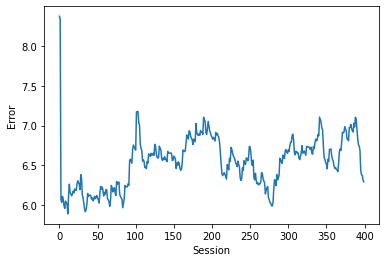

In [35]:
error=[]
# Defining a Q function which will be changing through out the iterations
Q_Values=np.zeros([10,2])
gamma=0.8
invT = 30
for trial in range(400):
  #Taking a random image
  i = np.random.randint(1,9)
  state = np.zeros((10,))
  state[i] = 1
  simage = imagestate(state)
  while True:
    if terminal_state(state): 
      break
    if trial > 100 and invT > 0.1: 
      invT = 30

    prediction=rlmodel.predict(simage, steps=1, verbose=0)
    aidx=np.argmax(prediction)

    number = np.where(state == 1)
    number = np.array(number).flatten()
    s = number[0]
    Q_Values[s]=prediction

    if np.random.rand() < epsilon : 
      aidx=1-aidx
    a=2*aidx-1
    next_state = tau(state,a)
    next_simage = imagestate(next_state)
    if terminal_state(next_state): 
      y = rho(next_state)
    else:
      y = rho(next_state) + gamma*np.max(rlmodel.predict(next_simage, steps=1, verbose=0))
    prediction[0,aidx]=y
    rlmodel.fit(simage, prediction, epochs=1, verbose=0)
    simage = np.copy(next_simage)
    state = np.copy(next_state)
  error.append(np.sum(np.sum(np.abs(np.subtract(Q_Values,Q))))) 
plt.plot(error); 
plt.xlabel('Session'); 
plt.ylabel('Error')

In [ ]:
policy = np.zeros(10)
Q=[]

image = np.zeros((1,xtestdata.shape[1],xtestdata.shape[2]))
image[0] = xtestdata[3]
s = np.zeros((10,))
s[0] = 1
s = np.around(s,0)
for i in range(0,10):
    Qs=rlmodel.predict(image, steps=1)[0]
    Q.append(Qs)
    aidx=np.argmax(Qs)
    policy[i]=2*aidx-1
    s = np.roll(s,1)
    image = imagefromstate(s)
print(np.transpose(Q))
print('policy:',np.transpose(policy))